In [4]:
from base import *
import pandas as pd

## Attente entre achat et réception (par mois)

In [16]:
dates = orders.selectExpr("order_purchase_timestamp as Achat", "order_approved_at as PaiementConfirme","order_delivered_carrier_date as LivraisonPoste", "order_estimated_delivery_date as LivraisonEstime", "order_delivered_customer_date as Reception").dropna()

"""
Reception - Achat = Délai global
LivraisonPoste - PaiementConfirme = Notre reactivité
LivraisonEstime - Reception = Précision estimation
LivraisonPoste - Reception = Compétence livreur
"""

dates=dates.withColumn("Délai global (j)", abs((unix_timestamp(dates['Reception']) - 
                       unix_timestamp(dates['Achat']))/60/60/24))
dates=dates.withColumn("Réactivité vendeur (h)", abs((unix_timestamp(dates['LivraisonPoste']) - 
                       unix_timestamp(dates['PaiementConfirme']))/60/60))
dates=dates.withColumn("Précision estimation (j)", abs((unix_timestamp(dates['LivraisonEstime']) - 
                       unix_timestamp(dates['Reception']))/60/60/24))
dates=dates.withColumn("Réactivité livreur (j)", abs((unix_timestamp(dates['Reception']) - 
                       unix_timestamp(dates['LivraisonPoste']))/60/60/24))
dates=dates.select("Délai global (j)","Réactivité vendeur (h)","Précision estimation (j)","Réactivité livreur (j)","Achat")
dates=dates.withColumn("Achat",substring(to_date(dates.Achat),0,7))
dates=dates.groupBy("Achat").avg("Délai global (j)","Réactivité vendeur (h)","Précision estimation (j)","Réactivité livreur (j)")
dates.show()

+-------+---------------------+---------------------------+-----------------------------+---------------------------+
|  Achat|avg(Délai global (j))|avg(Réactivité vendeur (h))|avg(Précision estimation (j))|avg(Réactivité livreur (j))|
+-------+---------------------+---------------------------+-----------------------------+---------------------------+
|2017-09|    11.84154200476688|          67.08266851450155|            11.48983678295975|          8.647374738334985|
|2017-10|   11.870721955486074|          73.42339027839809|           12.027938941202246|          8.417371449721275|
|2017-05|   11.322374729013218|         61.875747845165336|           13.751936301781326|          8.344295875124066|
|2018-06|    9.239216293167344|         53.057018582312644|           18.864105842021484|          6.684000327324539|
|2017-11|   15.161103113438633|          86.79744176119031|           10.373998952171512|         11.094664563069166|
|2018-03|   16.281127200445848|          71.411123605756

## Utilisation des délais par rapport à la satisfaction

In [12]:
#Evolution avec le temps
pandate = dates.toPandas()

In [13]:
pandate['Achat'] = pd.to_datetime(pandate['Achat'])
pandate.index = pandate['Achat']
del pandate['Achat']


In [14]:
# A faire sur Tableau
pandate.plot(figsize=(13,13))

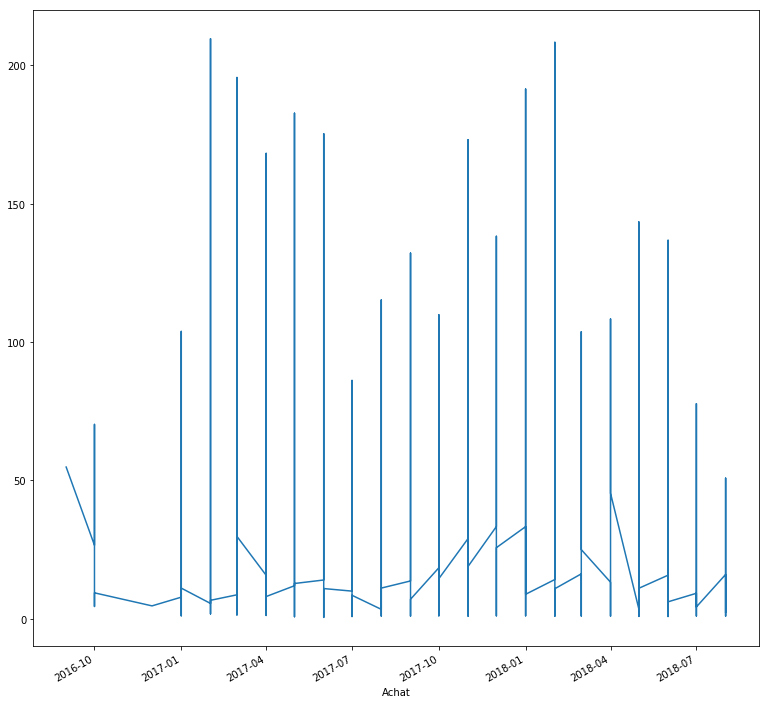

In [15]:

delaiGlobal = pandate["Délai global (j)"]
delaiGlobal.plot(figsize=(13,13))